In [96]:
class myLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, Y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(Y_train[i] - Y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
            
        self.m = num/den
        self.b = Y_train.mean() - (self.m * X_train.mean())
        
        print(self.m)
        print(self.b)
    
    def predict(self, X_test):
        return self.m * X_test + self.b

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
np.random.seed(42)

cgpa = np.round(np.random.uniform(6.0, 10.0, 100),2)
noise = np.random.normal(0,2,100)
package = np.round((cgpa*5)+noise,2)

df = pd.DataFrame({'CGPA': cgpa, 'Package (LPA)': package})

In [99]:
df

,CGPA,Package (LPA)
0,7.50,37.67
1,9.80,48.40
2,8.93,44.83
3,8.39,37.97
4,6.62,32.66
...,...,...
95,7.98,38.27
96,8.09,40.30
97,7.71,39.23
98,6.10,31.05


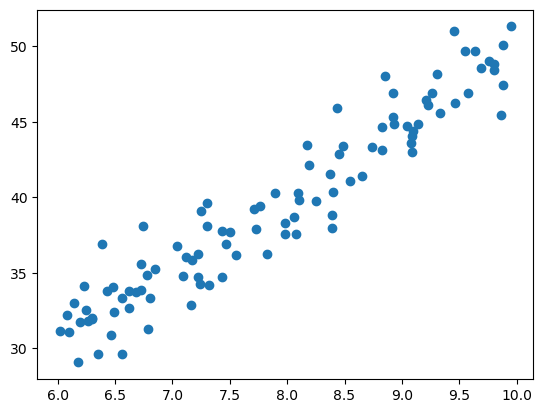

In [100]:
plt.scatter(df['CGPA'],df['Package (LPA)'])
plt.show()

In [101]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [104]:
X_train.shape

(80,)

In [105]:
X_train

array([9.23, 9.88, 7.24, 7.04, 9.26, 6.62, 9.14, 6.3 , 8.83, 9.31, 8.17,
       9.8 , 7.73, 8.19, 7.22, 7.43, 6.23, 7.89, 8.85, 6.08, 9.33, 9.58,
       8.55, 8.39, 7.98, 6.26, 7.16, 6.8 , 7.55, 9.69, 8.83, 8.09, 8.1 ,
       7.3 , 6.78, 7.98, 7.12, 8.65, 7.71, 8.4 , 6.79, 9.08, 6.48, 6.1 ,
       8.92, 9.45, 9.88, 9.76, 6.56, 9.55, 9.09, 7.25, 6.3 , 9.95, 8.49,
       6.18, 9.8 , 8.74, 9.1 , 6.14, 6.62, 9.21, 7.76, 6.39, 8.45, 6.68,
       7.43, 8.08, 7.3 , 8.25, 6.74, 9.86, 9.46, 8.92, 7.32, 9.64, 7.17,
       6.02, 6.73, 6.49])

In [106]:
lr = myLR()

In [107]:
lr.fit(X_train, Y_train)

4.7474690195322875
2.101273011779803


In [108]:
X_test[0]

np.float64(6.25)

In [109]:
print(lr.predict(X_test[0]))

31.7729543838566


In [110]:
from sklearn.metrics import r2_score

In [111]:
y_pred = []
for i in range(X_test.shape[0]):
    y_pred.append(lr.predict(X_test[i]))

In [112]:
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8689757137791254
